In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [7]:
bg = pd.read_csv('burglary.csv')

In [8]:
# rename column to a meaningful name
col ={'CMPLNT_FR_DT':'Date', 'CMPLNT_FR_TM' : 'Occ time', 'CRM_ATPT_CPTD_CD':'State'}
bg.rename(columns=col, inplace=True)
bg.head()

,Unnamed: 0,Date,Occ time,CMPLNT_TO_TM,RPT_DT,PD_DESC,State,OFNS_DESC,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,...,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,107,06/23/2006,16:00:00,NaN,06/23/2006,"BURGLARY,RESIDENCE,DAY",COMPLETED,BURGLARY,INSIDE,RESIDENCE - APT. HOUSE,...,NaN,NaN,NaN,NaN,40.828366,-73.872354,"(40.828365904, -73.872354078)",18-24,WHITE HISPANIC,M
1,210,06/23/2006,14:30:00,14:45:00,06/23/2006,"BURGLARY,RESIDENCE,DAY",COMPLETED,BURGLARY,INSIDE,RESIDENCE - APT. HOUSE,...,NaN,NaN,NaN,NaN,40.598445,-73.950175,"(40.598445031, -73.950174852)",65+,WHITE,F
2,224,06/23/2006,14:15:00,14:35:00,06/23/2006,"BURGLARY,RESIDENCE,DAY",COMPLETED,BURGLARY,INSIDE,RESIDENCE - APT. HOUSE,...,NaN,NaN,NaN,NaN,40.824950,-73.946916,"(40.824949518, -73.946915952)",25-44,BLACK,M
3,293,06/23/2006,13:00:00,16:00:00,06/23/2006,"BURGLARY,RESIDENCE,DAY",ATTEMPTED,BURGLARY,OPPOSITE OF,RESIDENCE-HOUSE,...,NaN,NaN,NaN,NaN,40.669374,-73.767661,"(40.669374367, -73.767661206)",65+,BLACK,M
4,311,06/23/2006,12:30:00,17:30:00,06/23/2006,"BURGLARY,RESIDENCE,DAY",COMPLETED,BURGLARY,INSIDE,RESIDENCE-HOUSE,...,NaN,NaN,NaN,NaN,40.841814,-73.850553,"(40.841813522, -73.850553051)",25-44,BLACK HISPANIC,F


In [9]:
# convert date to datetime
bg['Date'] = pd.to_datetime(bg['Date'], errors = 'coerce')

In [20]:
# to get burglary per year
bg['year'] = bg['Date'].dt.year
# to ignore bizzar data
bg = bg[bg['year'] >= 2006]
year = bg['year'].value_counts()
bg.head()

,Unnamed: 0,Date,Occ time,CMPLNT_TO_TM,RPT_DT,PD_DESC,State,OFNS_DESC,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,...,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
0,107,2006-06-23,16:00:00,NaN,06/23/2006,"BURGLARY,RESIDENCE,DAY",COMPLETED,BURGLARY,INSIDE,RESIDENCE - APT. HOUSE,...,NaN,NaN,NaN,40.828366,-73.872354,"(40.828365904, -73.872354078)",18-24,WHITE HISPANIC,M,2006
1,210,2006-06-23,14:30:00,14:45:00,06/23/2006,"BURGLARY,RESIDENCE,DAY",COMPLETED,BURGLARY,INSIDE,RESIDENCE - APT. HOUSE,...,NaN,NaN,NaN,40.598445,-73.950175,"(40.598445031, -73.950174852)",65+,WHITE,F,2006
2,224,2006-06-23,14:15:00,14:35:00,06/23/2006,"BURGLARY,RESIDENCE,DAY",COMPLETED,BURGLARY,INSIDE,RESIDENCE - APT. HOUSE,...,NaN,NaN,NaN,40.824950,-73.946916,"(40.824949518, -73.946915952)",25-44,BLACK,M,2006
3,293,2006-06-23,13:00:00,16:00:00,06/23/2006,"BURGLARY,RESIDENCE,DAY",ATTEMPTED,BURGLARY,OPPOSITE OF,RESIDENCE-HOUSE,...,NaN,NaN,NaN,40.669374,-73.767661,"(40.669374367, -73.767661206)",65+,BLACK,M,2006
4,311,2006-06-23,12:30:00,17:30:00,06/23/2006,"BURGLARY,RESIDENCE,DAY",COMPLETED,BURGLARY,INSIDE,RESIDENCE-HOUSE,...,NaN,NaN,NaN,40.841814,-73.850553,"(40.841813522, -73.850553051)",25-44,BLACK HISPANIC,F,2006


In [21]:
year = year.sort_index(axis=0, level=None, ascending=True, inplace=False, sort_remaining=True)

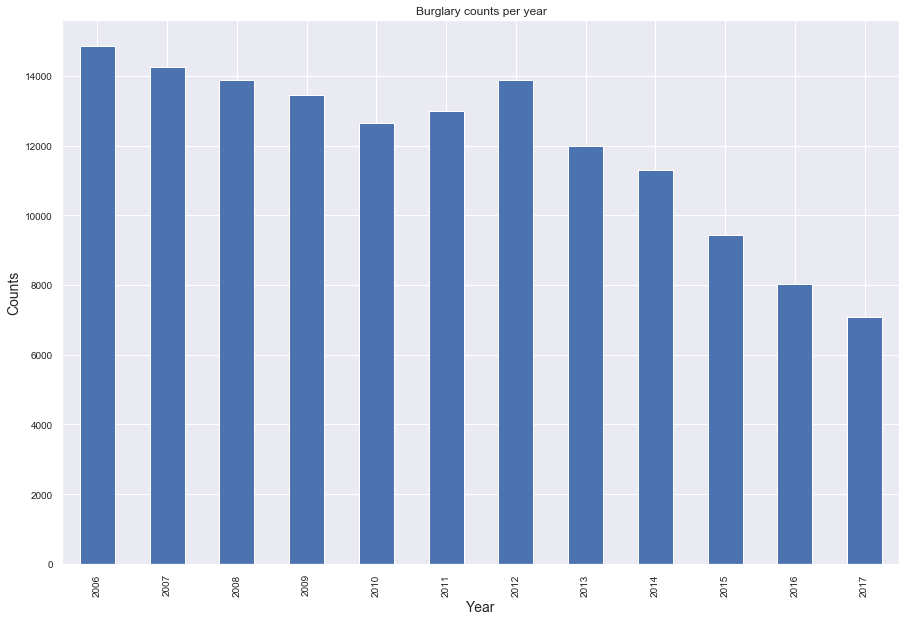

In [22]:
import matplotlib.pyplot as plt
ax = year.plot(kind='bar', title ="Burglary counts per year", figsize=(15, 10), fontsize=10)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
plt.savefig('Burglary_year.jpg')
plt.show()

In [92]:
# to get the day name
bg['weekday'] = bg['Date'].dt.day_name()  
wkday = pd.DataFrame(bg['weekday'].value_counts() / bg['weekday'].count() *100).reset_index()
#wkday = wkday.reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#wkday['index'] = wkday['index'].sort_values(days, inplace=True) 
wkday

,index,weekday
0,Friday,18.000501
1,Wednesday,15.826527
2,Thursday,15.486344
3,Monday,15.218510
4,Tuesday,14.762846
5,Saturday,11.635802
6,Sunday,9.069470


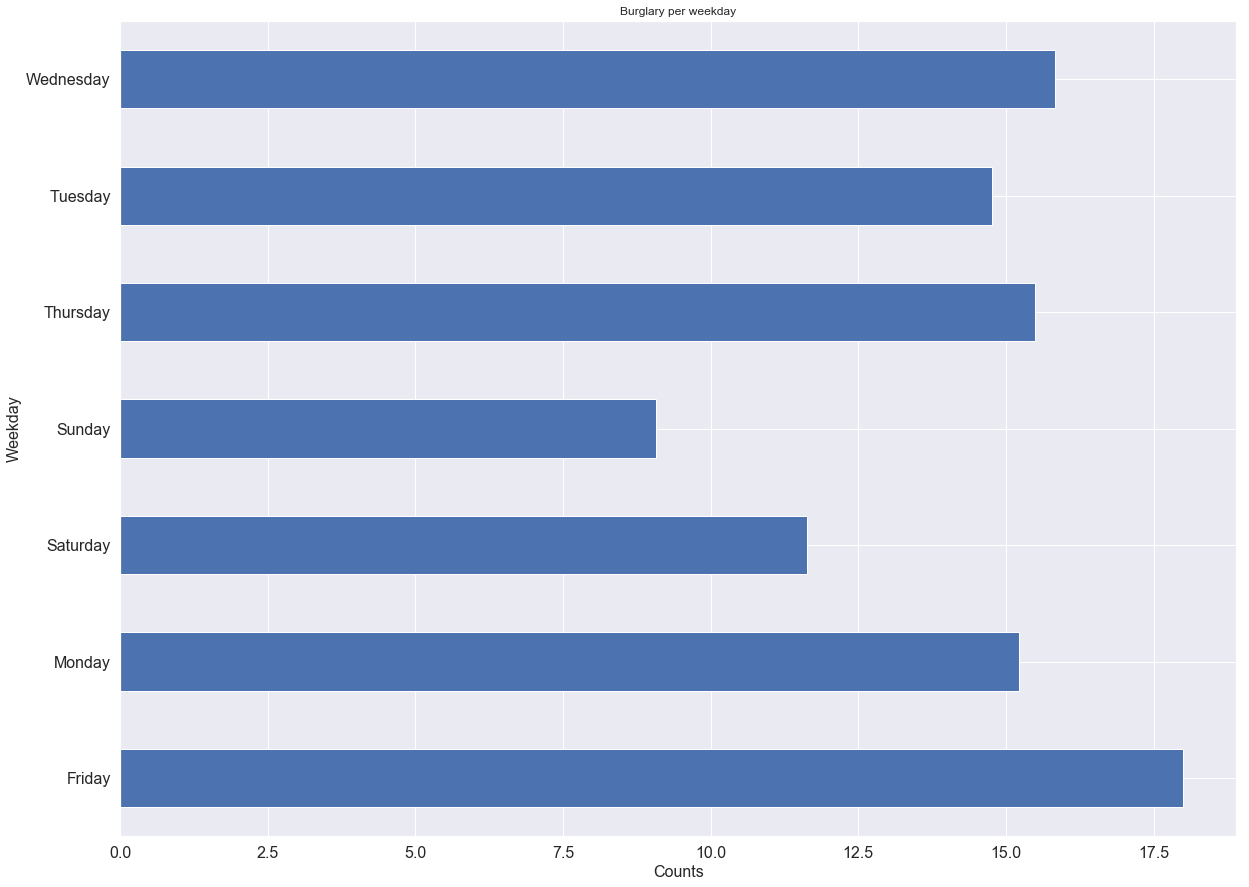

In [27]:
sns.set()
ax = wkday.plot(kind='barh', title ="Burglary per weekday", figsize=(20, 15), legend=False, fontsize=16)
ax.set_xlabel("Counts", fontsize=16)
ax.set_ylabel("Weekday", fontsize=16)
plt.savefig('Burglary_day.jpg')
plt.show()

In [71]:
# to get the month name
import calendar
bg['month'] = bg['Date'].dt.month  
mnth = pd.DataFrame(bg['month'].value_counts() / bg['month'].count() *100).sort_index()
mnth = mnth.reset_index()
mnth['index'] = mnth['index'].apply(lambda x: calendar.month_name[x])
mnth = mnth.set_index(mnth['index'])
mnth = mnth['month']
mnth

index
January      8.313275
February     6.994977
March        7.365770
April        7.157764
May          8.250664
June         8.085095
July         8.864942
August       9.232257
September    8.768244
October      9.219735
November     8.688242
December     9.059035
Name: month, dtype: float64

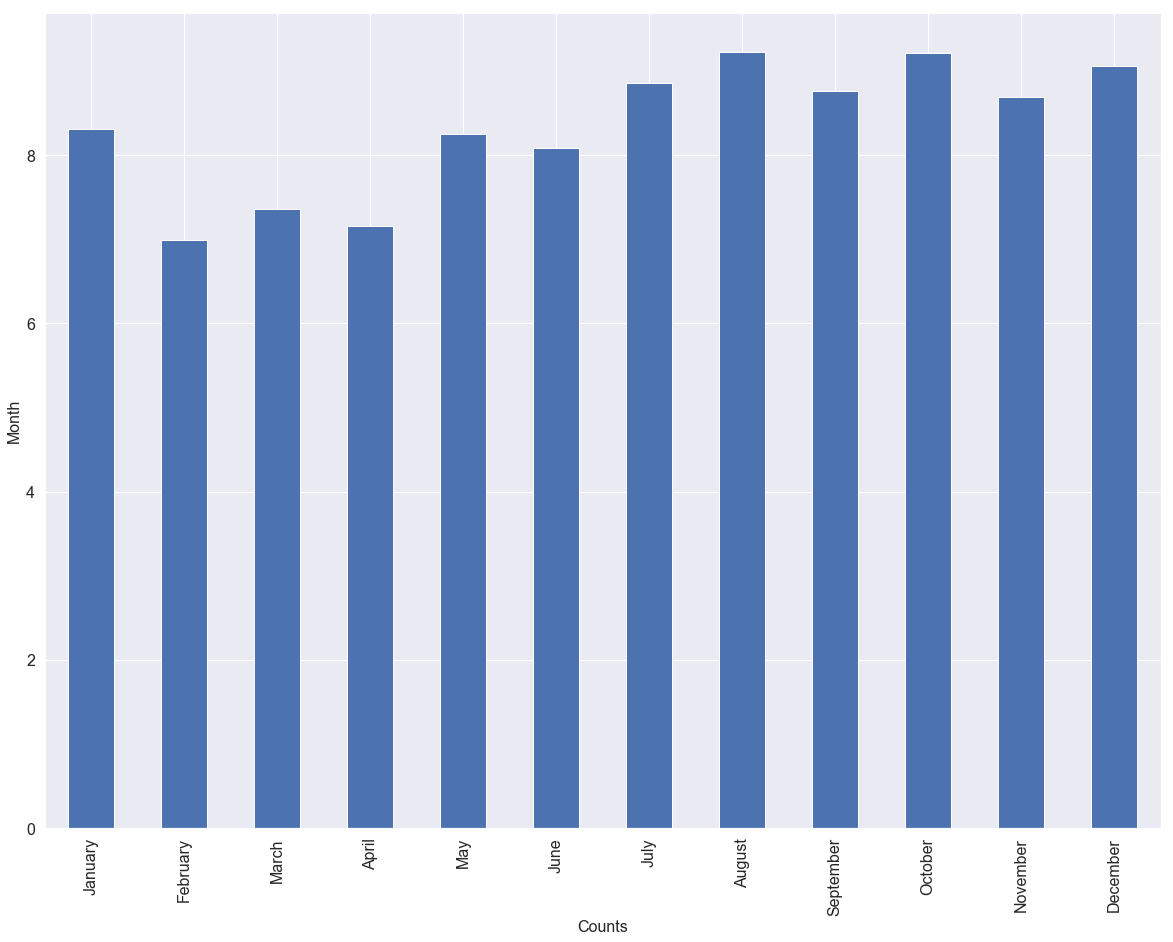

In [72]:
sns.set()
ax = mnth.plot(kind='bar', figsize=(20, 15), legend=False, fontsize=16)
ax.set_xlabel("Counts", fontsize=16)
ax.set_ylabel("Month", fontsize=16)
plt.savefig('Burglary_month.jpg')
plt.show()

In [138]:
# hottest crime day since 2006
bg.groupby('Date').OFNS_DESC.count().idxmax()

Timestamp('2012-11-21 00:00:00')

In [137]:
bg.groupby('Date').OFNS_DESC.count().max()

77

In [146]:
bg.groupby('Date').OFNS_DESC.count().idxmin()

Timestamp('2006-02-12 00:00:00')

In [147]:
bg.groupby('Date').OFNS_DESC.count().min()

4